In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import calendar
#import prophet
from datetime import datetime

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv("data/01_bikes_limpieza.csv", index_col = 0 )
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,winter,0,1,0,3,SI,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,winter,0,1,0,4,SI,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,winter,0,1,0,5,SI,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 97.0+ KB


In [4]:
df.shape

(730, 16)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila.
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    return dicc_indices

In [8]:
numericas = df.select_dtypes(include = np.number)
columnas = numericas.columns

In [9]:
indices = detectar_outliers(columnas, numericas)

In [10]:
out_casual = indices['casual']

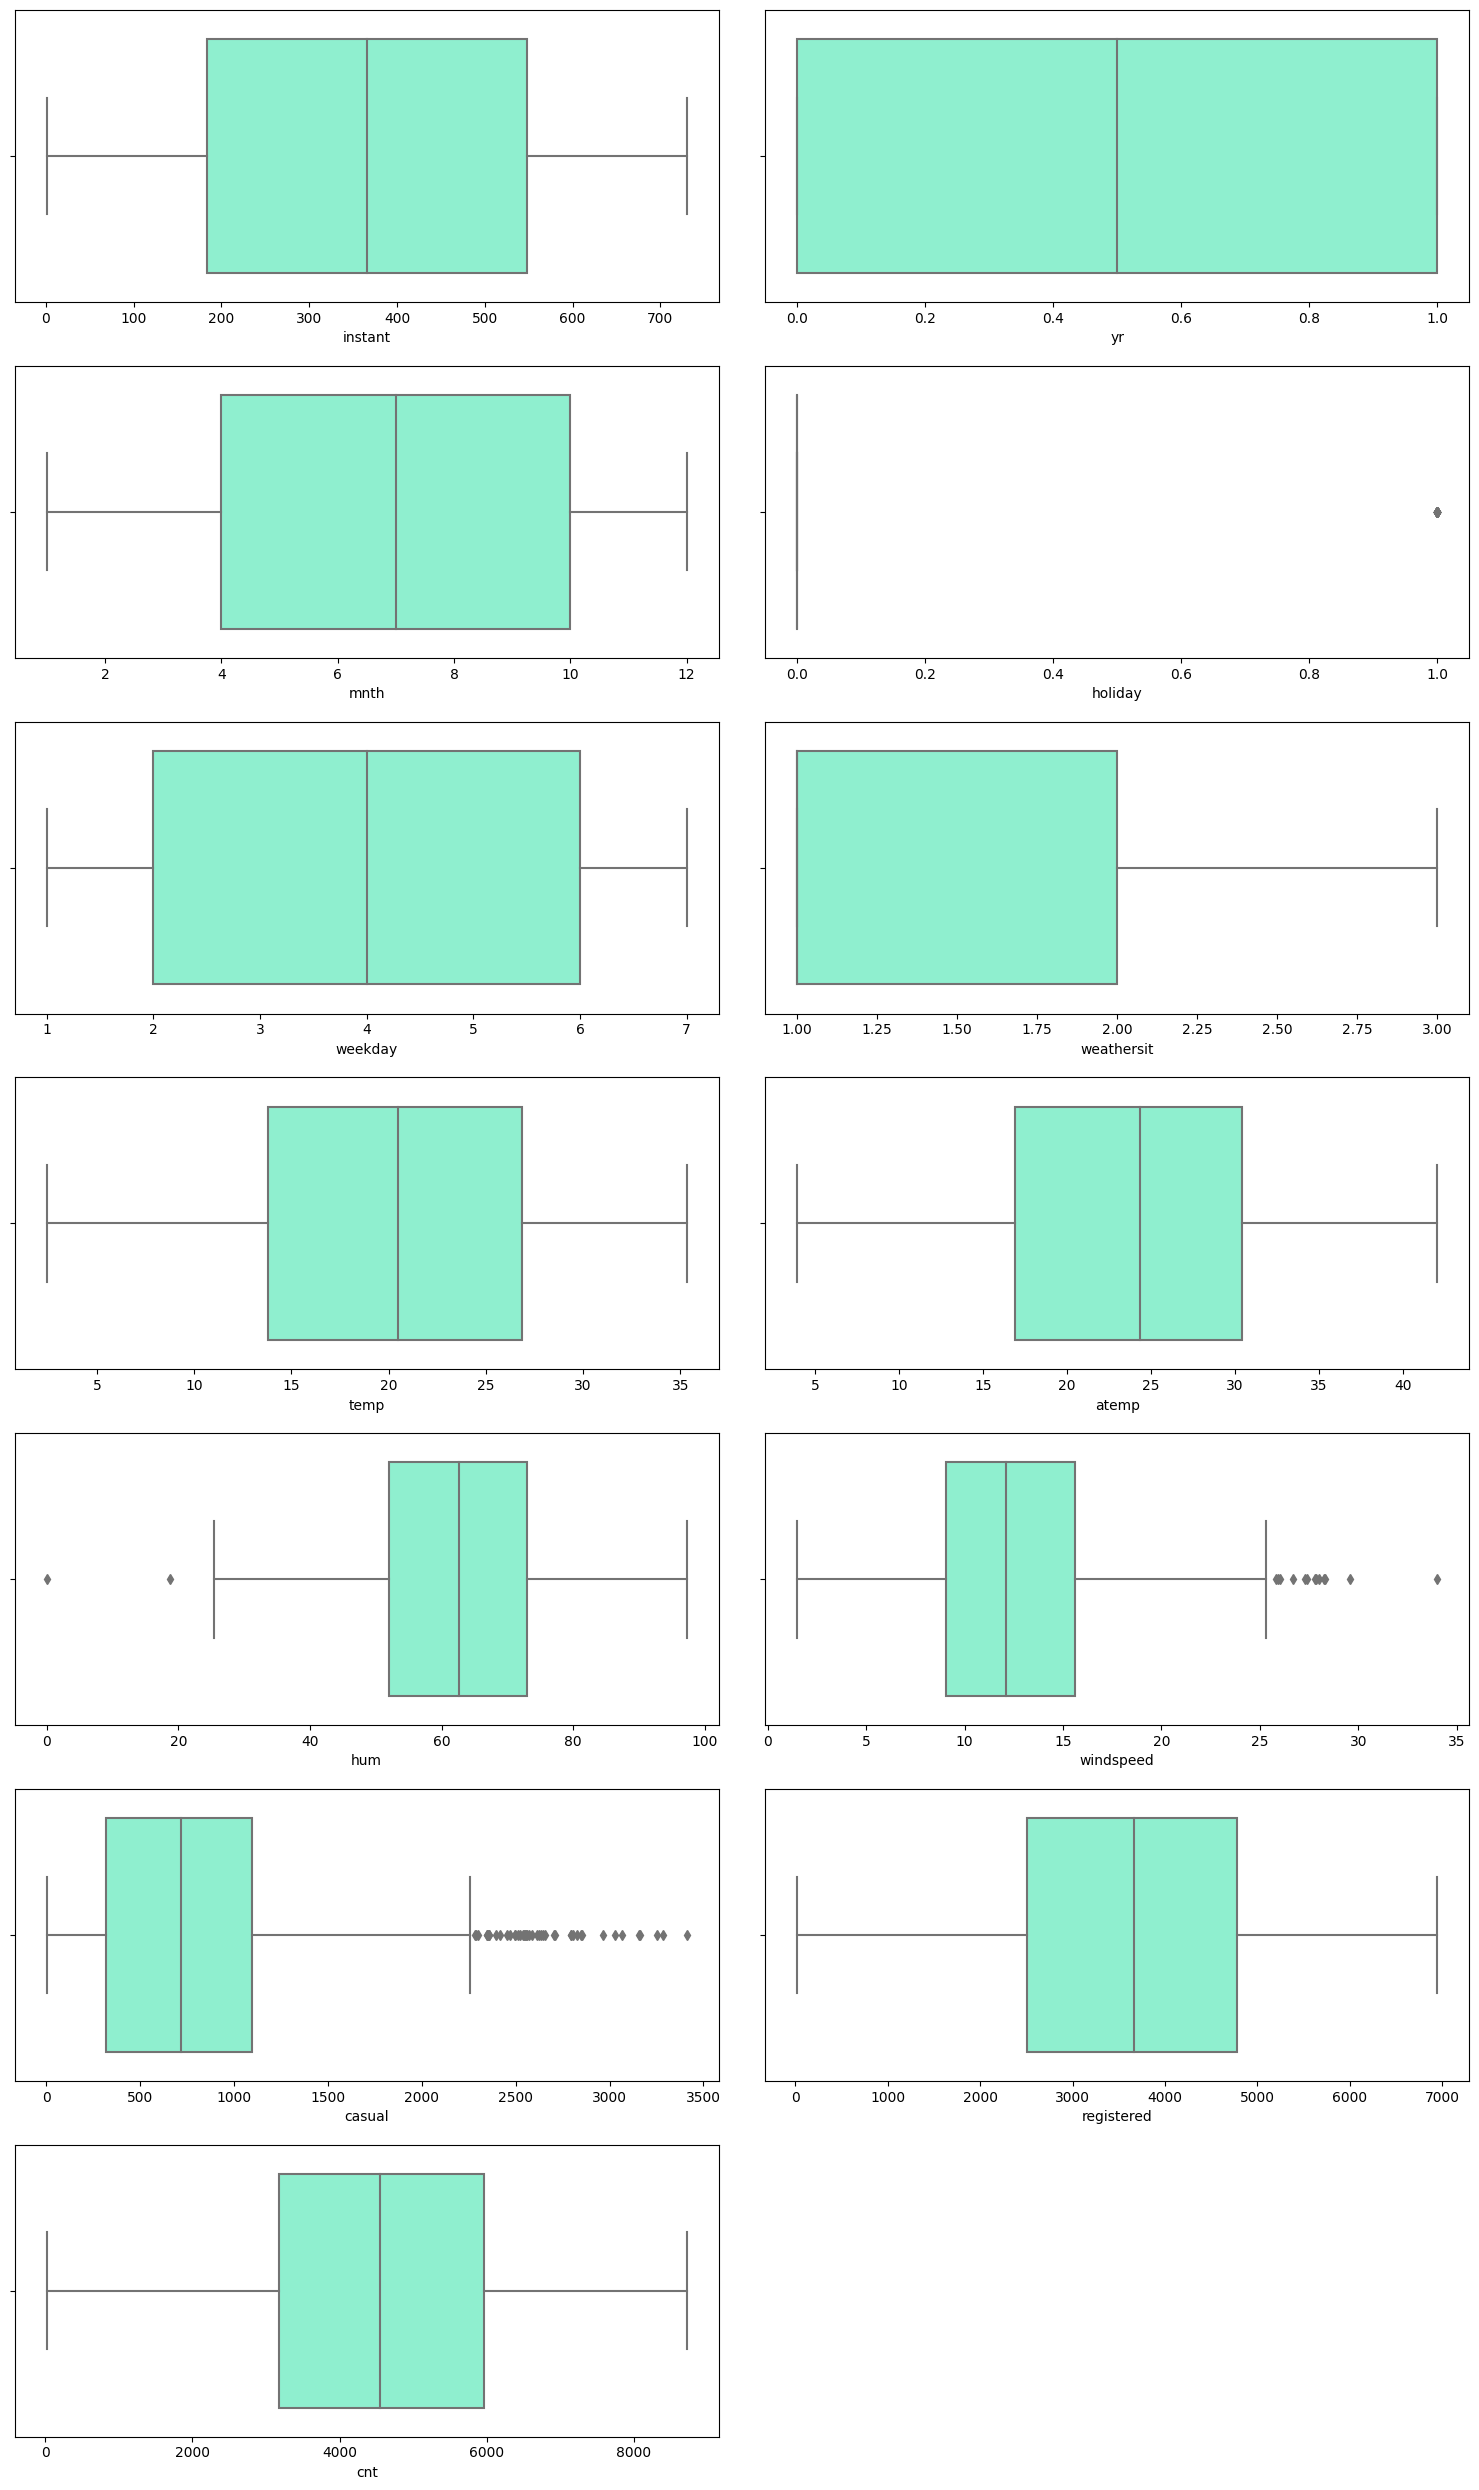

In [11]:
fig, axes = plt.subplots(7, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()


Seria interesante ver que que tienen en común los días en los que los casuales alquilan muchas más bicis

In [12]:
df[df['casual']> 2200]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
140,141,2018-05-21,spring,0,5,0,1,SI,1,24.702500,28.59875,62.6667,8.083550,2258,3547,5805
148,149,2018-05-29,spring,0,5,0,2,SI,1,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
182,183,2018-07-02,summer,0,7,0,1,SI,1,30.271653,33.36540,44.4583,7.709154,2204,2915,5119
183,184,2018-07-03,summer,0,7,0,2,SI,2,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,185,2018-07-04,summer,0,7,1,3,NO,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
196,197,2018-07-16,summer,0,7,0,1,SI,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
246,247,2018-09-04,summer,0,9,0,2,SI,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
280,281,2018-10-08,autumn,0,10,1,1,NO,1,21.388347,25.66210,70.1250,3.042081,2235,3174,5409
281,282,2018-10-09,autumn,0,10,0,2,SI,1,22.174153,26.19915,72.7500,4.251150,2397,3114,5511
440,441,2019-03-17,winter,1,3,0,7,NO,2,21.080847,25.25230,75.5833,7.417168,3155,4681,7836


In [21]:
df.weathersit.unique()


array([2, 1, 3])

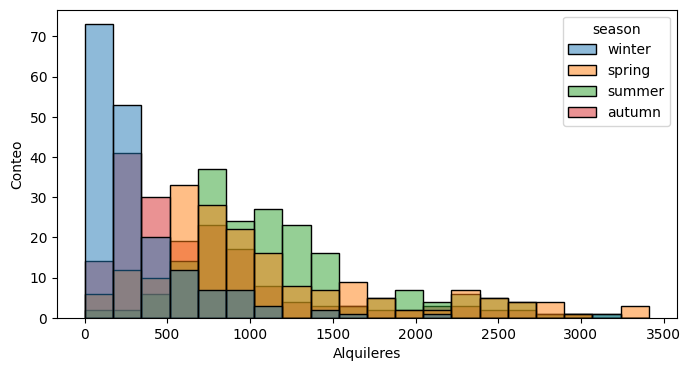

In [22]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='casual', data = df, hue = 'season')

# establecemos el nombre de los ejes, pero recordad que esto no es obligatorio ya que Seaborn nos los genera automaticamente
fig.set(ylabel='Conteo', xlabel = 'Alquileres')

# Ponemos título a  la gráfica
fig.set_title('')

# mostramos la gráfica
plt.show()


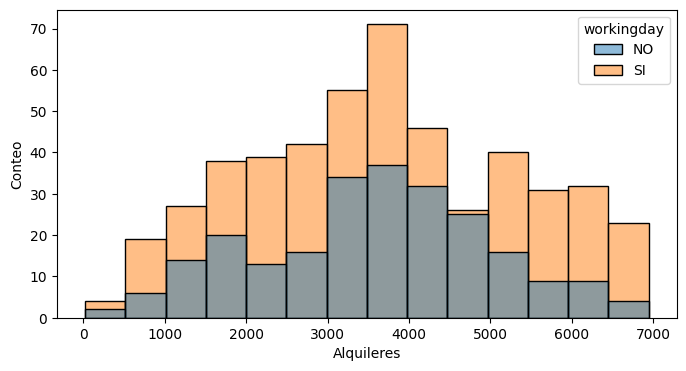

In [20]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='registered', data = df, hue = 'workingday')

# establecemos el nombre de los ejes, pero recordad que esto no es obligatorio ya que Seaborn nos los genera automaticamente
fig.set(ylabel='Conteo', xlabel = 'Alquileres')

# Ponemos título a  la gráfica
fig.set_title('')

# mostramos la gráfica
plt.show()

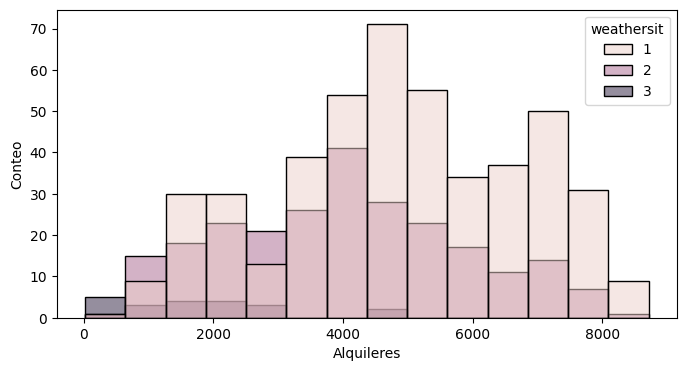

In [18]:
plt.figure(figsize =(8,4))

fig = sns.histplot(x='cnt', data = df, hue = 'weathersit')

# establecemos el nombre de los ejes, pero recordad que esto no es obligatorio ya que Seaborn nos los genera automaticamente
fig.set(ylabel='Conteo', xlabel = 'Alquileres')

# Ponemos título a  la gráfica
fig.set_title('')

# mostramos la gráfica
plt.show()

A primera vista podemos ver que los alquileres casuales tienen más que ver con si es dia laborable o no, más que incluso el tiempo.
A los usuarios registrados les afecta menos si es dia laborable o no.